In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm

In [12]:
npts = 50
mass = np.sort(np.random.randn(npts) * 0.2 + 1.2)

period = 2.0 * 10**1.0 * mass**-0.5
noise = mass * 0.4 * np.random.randn(npts)

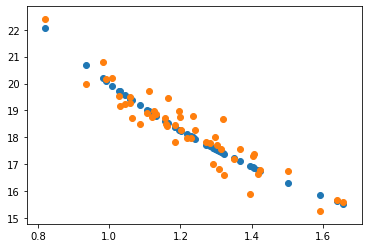

In [13]:
fig, ax = plt.subplots()
ax.scatter(mass, period)
ax.scatter(mass, period + noise)

In [35]:
simple = pm.Model()
X = mass[:, None]
y = period + noise

with simple:
    sigma = pm.Lognormal('sigma', np.log(1.0), 0.3)
    ls = pm.Lognormal('ls', np.log(0.3), 0.1)
    m0 = pm.Normal('gradient0', 0, 10)
    c0 = pm.Normal('intercept0', 0, 10)
    
    mean_func = pm.gp.mean.Linear(coeffs=m0, intercept=c0)
    cov_func = sigma * pm.gp.cov.ExpQuad(1, ls=ls)
    gp = pm.gp.Latent(mean_func=mean_func, cov_func=cov_func)
    
    f = gp.prior("f", X=X)
    
    yobs = pm.Normal('y_obs', f, 0.1, observed=y)

In [ ]:
with simple:
    trace = pm.sample(draws=100, tune=1000)

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/home/davies/.local/lib/python3.6/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
/home/davies/.local/lib/python3.6/site-packages/theano/tensor/basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [f_rotated_, intercept0, gradient0, ls, sigma]
Sampling 4 chains:  11%|█         | 467/4400 

In [29]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
gradient0,2.667478,1.775267,0.177493,-0.062309,4.999096,2.686267,2.557673
intercept0,1.659778,1.162488,0.116230,0.398842,4.193677,2.590996,2.681861
f_rotated___0,0.056818,0.529515,0.052951,-0.500875,0.637426,2.018567,19.830328
f_rotated___1,0.660812,0.427802,0.042779,0.159083,1.409011,2.050650,9.189159
f_rotated___2,0.252112,0.321878,0.032187,-0.286756,0.577741,2.057406,8.475681
f_rotated___3,0.322510,0.233779,0.023378,0.051382,0.726241,2.051592,9.041268
f_rotated___4,-0.063056,0.687139,0.068714,-0.685606,1.079016,2.011137,55.405529
f_rotated___5,0.131726,0.468607,0.046861,-0.494947,0.840728,2.015439,24.911845
f_rotated___6,0.178255,0.578094,0.057809,-0.582892,1.048718,2.010224,138.841069
f_rotated___7,0.462160,0.522025,0.052202,-0.394832,1.060356,2.012480,37.105511


<ErrorbarContainer object of 3 artists>

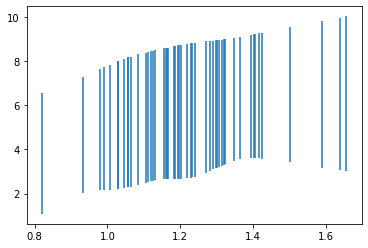

In [30]:
fig, ax = plt.subplots()
ax.errorbar(mass, trace['f'].mean(axis=0), yerr=trace['f'].std(axis=0), linestyle='none')

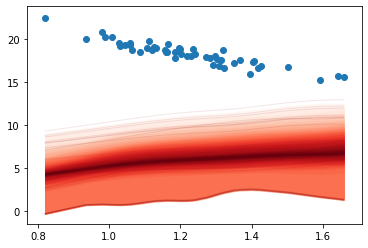

In [31]:
fig, ax = plt.subplots()
from pymc3.gp.util import plot_gp_dist
plot_gp_dist(ax, trace["f"], X);

ax.scatter(X, y)

In [23]:
x_new = np.linspace(0.7, 1.8, 1000)[:, None]

with simple:
    #f_pred = gp.conditional('f_pred', x_new)
    pred_samples = pm.sample_posterior_predictive(trace, vars=[f_pred], samples=100)


100%|██████████| 100/100 [01:00<00:00,  1.69it/s]


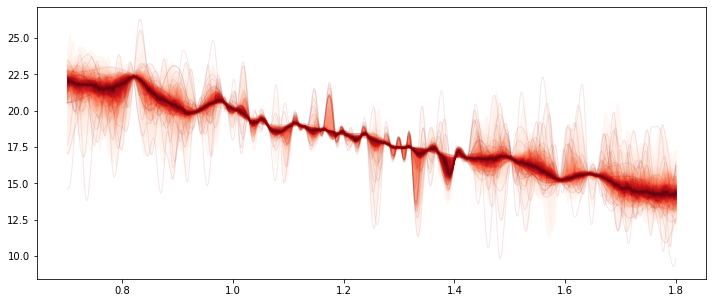

In [25]:
x_new = np.linspace(0.7, 1.8, 1000)[:, None]
fig = plt.figure(figsize=(12,5)); ax = fig.gca()

# plot the samples from the gp posterior with samples and shading
from pymc3.gp.util import plot_gp_dist
plot_gp_dist(ax, pred_samples["f_pred"], x_new);
